In [184]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import cross_val_score

import folium
from folium import plugins
from folium.plugins import HeatMap

In [27]:
#import dataset
df = pd.read_csv('./Downloads/california.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
#dimensiones
df.shape

(20640, 10)

In [29]:
#tipos de variables
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [30]:
#estadistica descriptiva de los datos
data = df.drop(['longitude','latitude'],axis=1)
data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
#correlacion
data.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

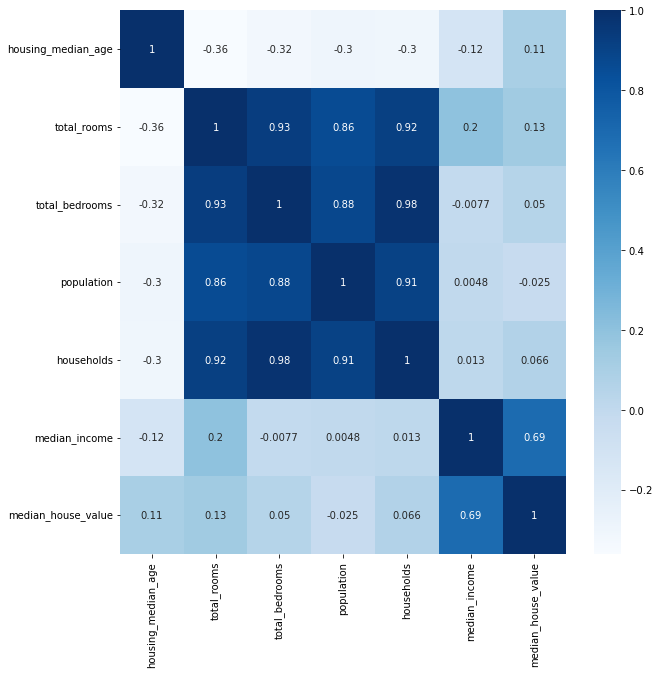

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

<Figure size 720x720 with 0 Axes>

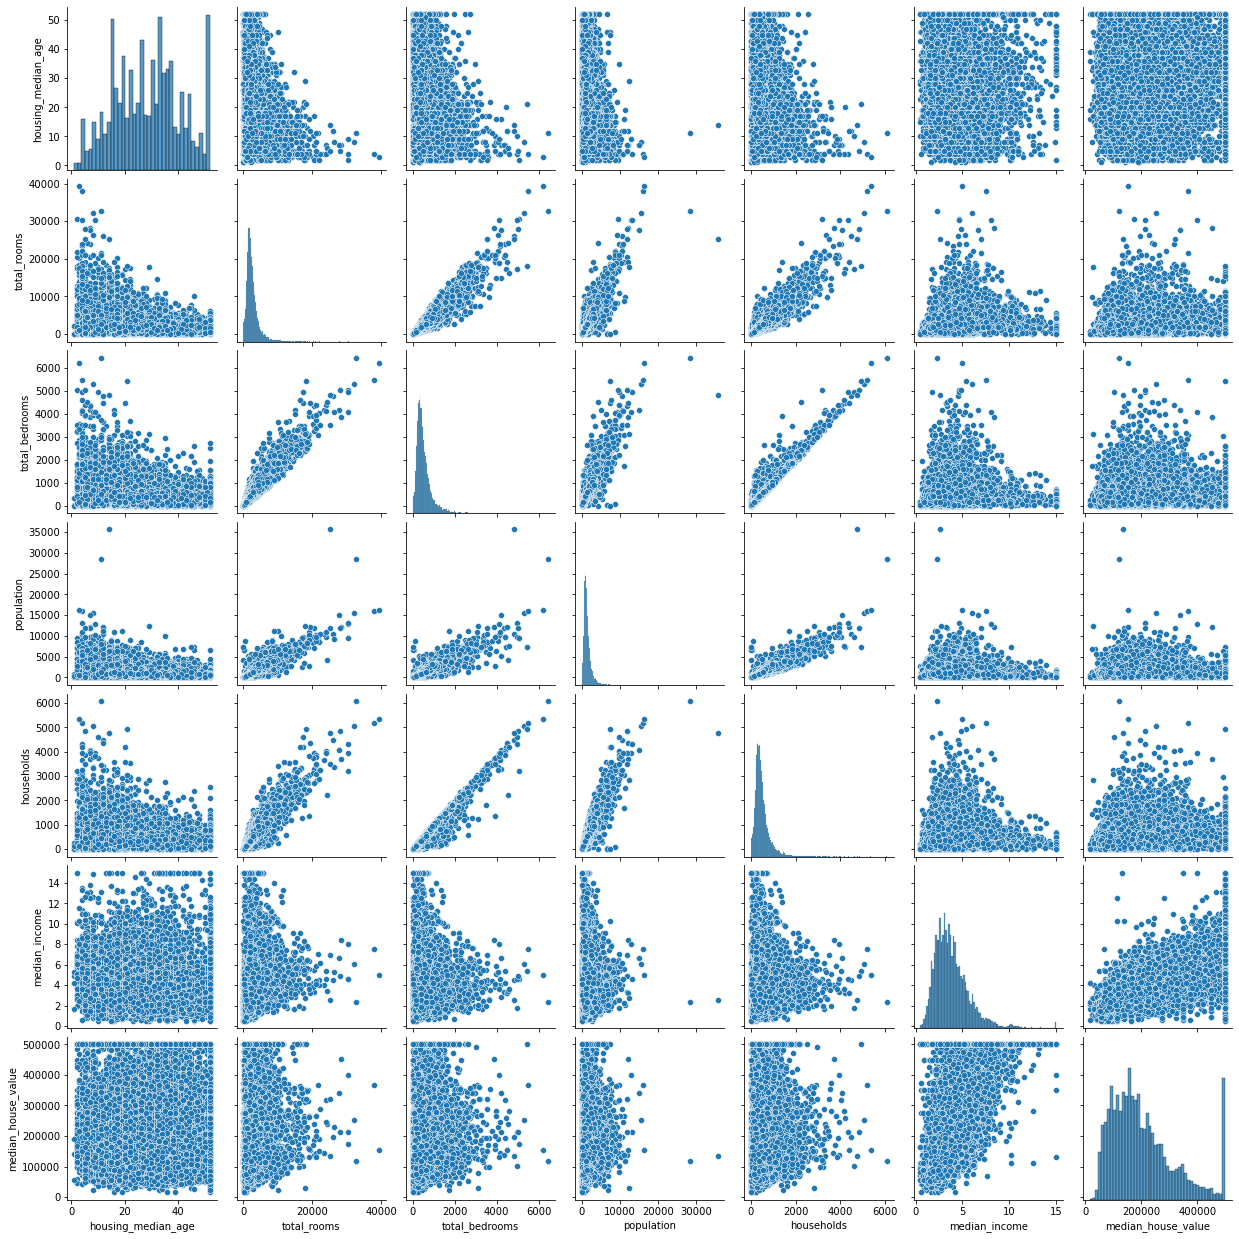

In [57]:
plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

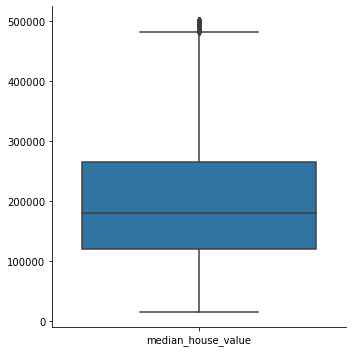

In [102]:
price = df.iloc[:,8:-1]
sns.catplot(data=price,kind='box')
plt.show()

<Figure size 1440x1440 with 0 Axes>

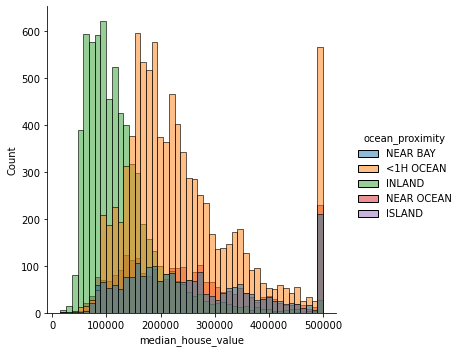

In [41]:
#distribucion de los precios
plt.figure(figsize=(20,20))
sns.displot(data,x='median_house_value',hue='ocean_proximity')
plt.show()

<Figure size 1080x1080 with 0 Axes>

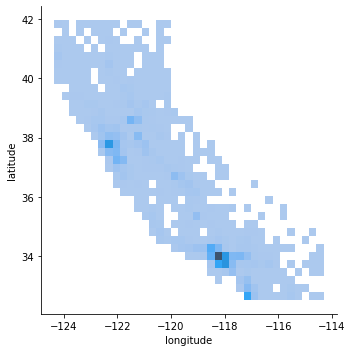

In [53]:
plt.figure(figsize=(15,15))
sns.displot(data=df,x='longitude',y='latitude')
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

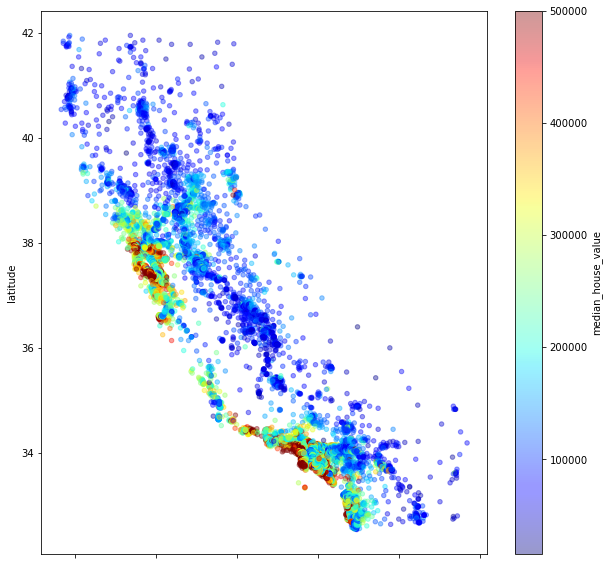

In [130]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,figsize=(10,10),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

In [125]:
mapa = folium.Map(location=[37.50,-122.2],zoom_start=6)

In [129]:
#coordenadas
distritos = df[['latitude','longitude']].to_numpy()
HeatMap(distritos,radius=15,min_opacity=0.4).add_to(mapa)
mapa

In [131]:
#revisar y eliminar valores nulos
df.isnull().values.any()

True

In [132]:
len(df)

20640

In [134]:
df = df.dropna()
len(df)

20433

In [140]:
#usando get dummies 
ocean_proximity = pd.get_dummies(df['ocean_proximity'])
df = df.drop('ocean_proximity',axis=1)
df.join(ocean_proximity)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<h1>seleccion de features y target</h1>

In [144]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(16346, 8) (16346,) (4087, 8) (4087,)


Linear
MSE : 4921881237.628149


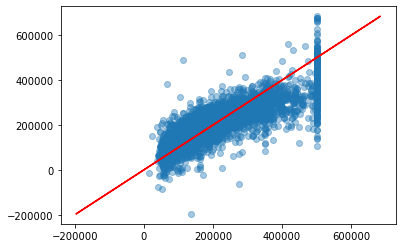

In [162]:
model = LinearRegression()

model.fit(X_train,y_train)
prediccion = model.predict(X_test)
mse = mean_squared_error(y_test,prediccion)
    
print(name)
print(f'MSE : {mse}')
    
plt.scatter(y_test,prediccion,alpha=0.4)
plt.plot(prediccion,prediccion,c='r')
plt.show()

<h1>Cross validation</h1>

In [180]:
linear_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
linear_score

array([-4.43969398e+09, -3.99212587e+09, -7.85365045e+09, -3.33232071e+09,
       -6.71745569e+09, -5.14355723e+09, -2.92422382e+09, -7.44010288e+09,
       -6.01629313e+09, -3.04717234e+09])

In [181]:
linear_rmse_scores = np.sqrt(-linear_score)

In [182]:
#definir una funciojn que nos devuelva el score, mean y std
def display_scores(scores):
    print('scores: ',scores)
    print('Mean: ',scores.mean())
    print('starnd deviation: ',scores.std())

In [183]:
display_scores(linear_rmse_scores)

scores:  [66631.02867795 63183.27204236 88620.82400015 57726.25670986
 81960.08593309 71718.5975369  54076.09288049 86256.03098094
 77564.76732785 55201.198732  ]
Mean:  70293.81548215778
starnd deviation:  12224.529239025223


<h1>DecisionTree</h1>

In [187]:
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)
tree_reg_score = cross_val_score(tree_reg,X,y,scoring='neg_mean_squared_error',cv=10)

tree_rmse_score = np.sqrt(-tree_reg_score)

display_scores(tree_rmse_score)


scores:  [142384.52527654  87839.96321215 102081.90729237  75549.83128492
  89338.99503118  87878.85131886  69161.72244036 105055.89324028
 108259.51894571  76375.92648199]
Mean:  94392.71345243455
starnd deviation:  20237.342058435308
